<a href="https://colab.research.google.com/github/AtabikM1/PCVK25_3F_05/blob/main/week5_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


<BarContainer object of 256 artists>

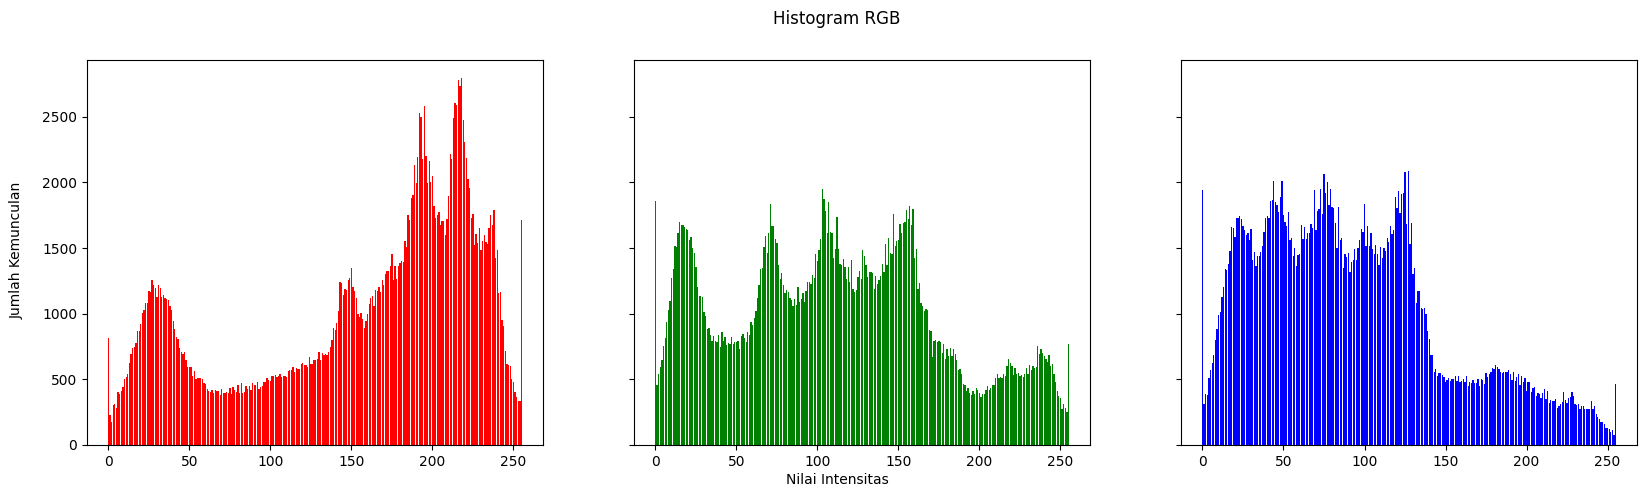

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import math
import numpy as np
import os
import glob
img = cv.imread('/content/gdrive/MyDrive/PCVK_MM/Images/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

height, width, depth = np.shape(img)
names = np.arange(256)

red = [0]*256
green = [0]*256
blue = [0]*256

for y in range(0, height):
    for x in range(0, width):
        red[img[y][x][0]] += 1
        green[img[y][x][1]] += 1
        blue[img[y][x][2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', ha='center', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Nilai Intensitas', ha='center', va='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')


1. Buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh
NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?



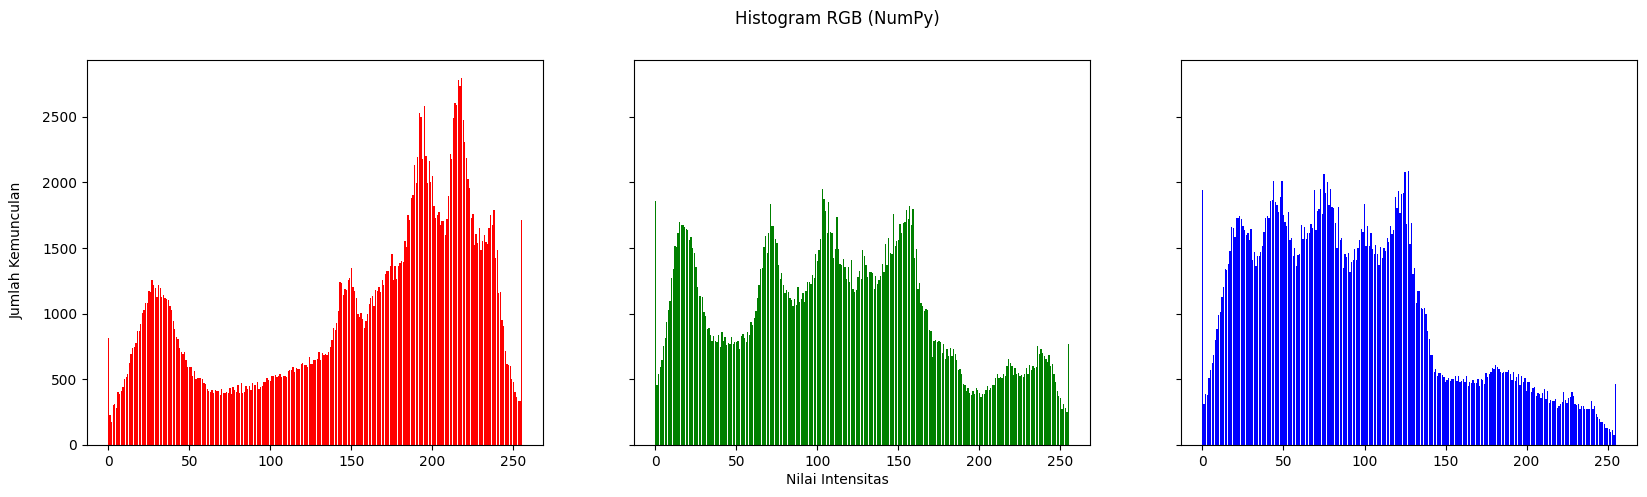

Apakah histogram manual dan numpy sama?
Red channel: True
Green channel: True
Blue channel: True


In [4]:
hist_red, bins_red = np.histogram(img[:, :, 0], bins=256, range=(0, 256))
hist_green, bins_green = np.histogram(img[:, :, 1], bins=256, range=(0, 256))
hist_blue, bins_blue = np.histogram(img[:, :, 2], bins=256, range=(0, 256))

fig2, axs2 = plt.subplots(1, 3, figsize=[20, 5], sharex=True, sharey=True)
fig2.suptitle('Histogram RGB (NumPy)')
fig2.text(0.09, 0.5, 'Jumlah Kemunculan', ha='center', va='center', rotation='vertical')
fig2.text(0.5, 0.04, 'Nilai Intensitas', ha='center', va='center')
axs2[0].bar(names, hist_red, color='red')
axs2[1].bar(names, hist_green, color='green')
axs2[2].bar(names, hist_blue, color='blue')
plt.show()


2. Buatlah histogram dengan menggunakan dengan menggunakan image KTM lama.jpg.
Analisis distribusi intensitas dari histogram yang dihasilkan apakah gambar cenderung
gelap, terang, atau kontras rendah.


<BarContainer object of 256 artists>

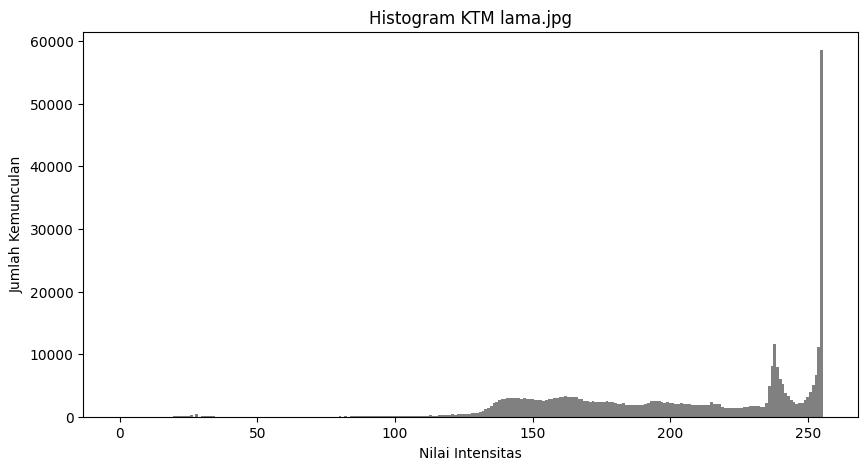

In [5]:
ktm = cv.imread('/content/gdrive/MyDrive/PCVK_MM/Images/KTM lama.jpg', cv.IMREAD_GRAYSCALE)
hist_ktm, bins_ktm = np.histogram(ktm, bins=256, range=(0, 256))
plt.figure(figsize=[10, 5])
plt.title('Histogram KTM lama.jpg')
plt.xlabel('Nilai Intensitas')
plt.ylabel('Jumlah Kemunculan')
plt.bar(bins_ktm[:-1], hist_ktm, width=1, color='gray')

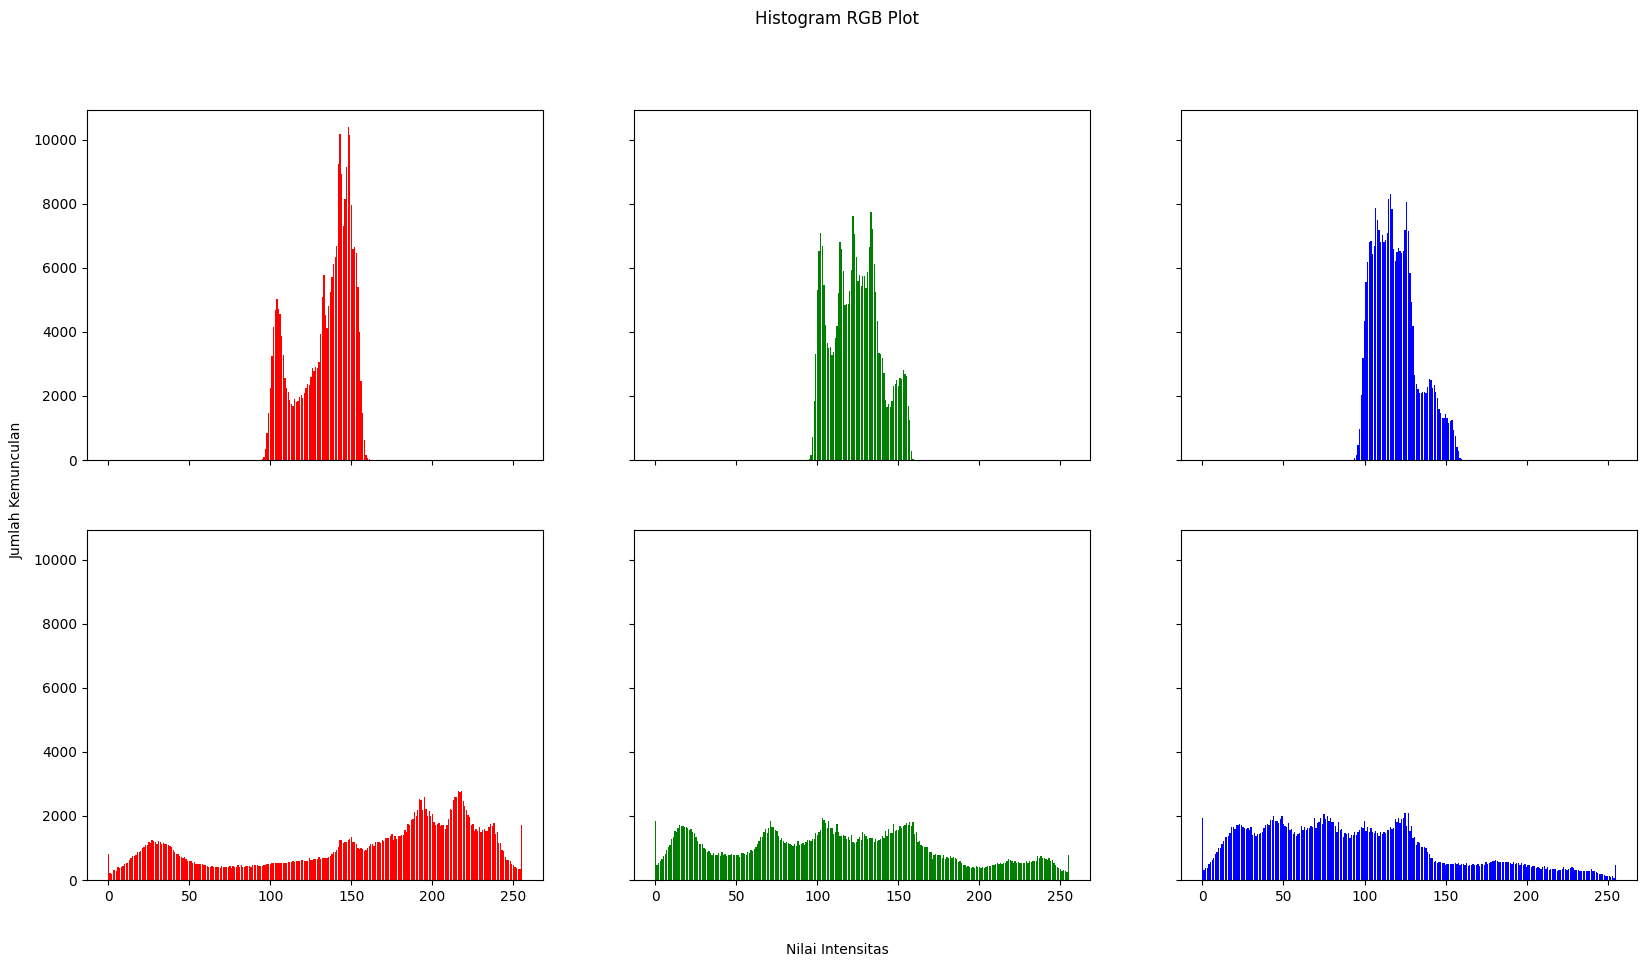

In [6]:
img_lc = cv.imread('/content/gdrive/MyDrive/PCVK_MM/Images/lena_lc.jpg')

img_lc = cv.cvtColor(img_lc, cv.COLOR_BGR2RGB)

height_lc, width_lc, depth_lc = np.shape(img_lc)
names_lc = np.arange(256)

red_lc = [0]*256
green_lc = [0]*256
blue_lc = [0]*256

for y in range(0, height_lc):
    for x in range(0, width_lc):
        red_lc[img_lc[y][x][0]] += 1
        green_lc[img_lc[y][x][1]] += 1
        blue_lc[img_lc[y][x][2]] += 1

names_lc = np.arange(256)
fig3, axs3 = plt.subplots(2, 3, figsize=[20, 10], sharex=True, sharey=True)
fig3.suptitle('Histogram RGB Plot')
fig3.text(0.09, 0.5, 'Jumlah Kemunculan', ha='center', va='center', rotation='vertical')
fig3.text(0.5, 0.04, 'Nilai Intensitas', ha='center', va='center')
axs3[0, 0].bar(names_lc, red_lc, color='red')
axs3[0, 1].bar(names_lc, green_lc, color='green')
axs3[0, 2].bar(names_lc, blue_lc, color='blue')
axs3[1, 0].bar(names, red, color='red')
axs3[1, 1].bar(names, green, color='green')
axs3[1, 2].bar(names, blue, color='blue')
plt.show()

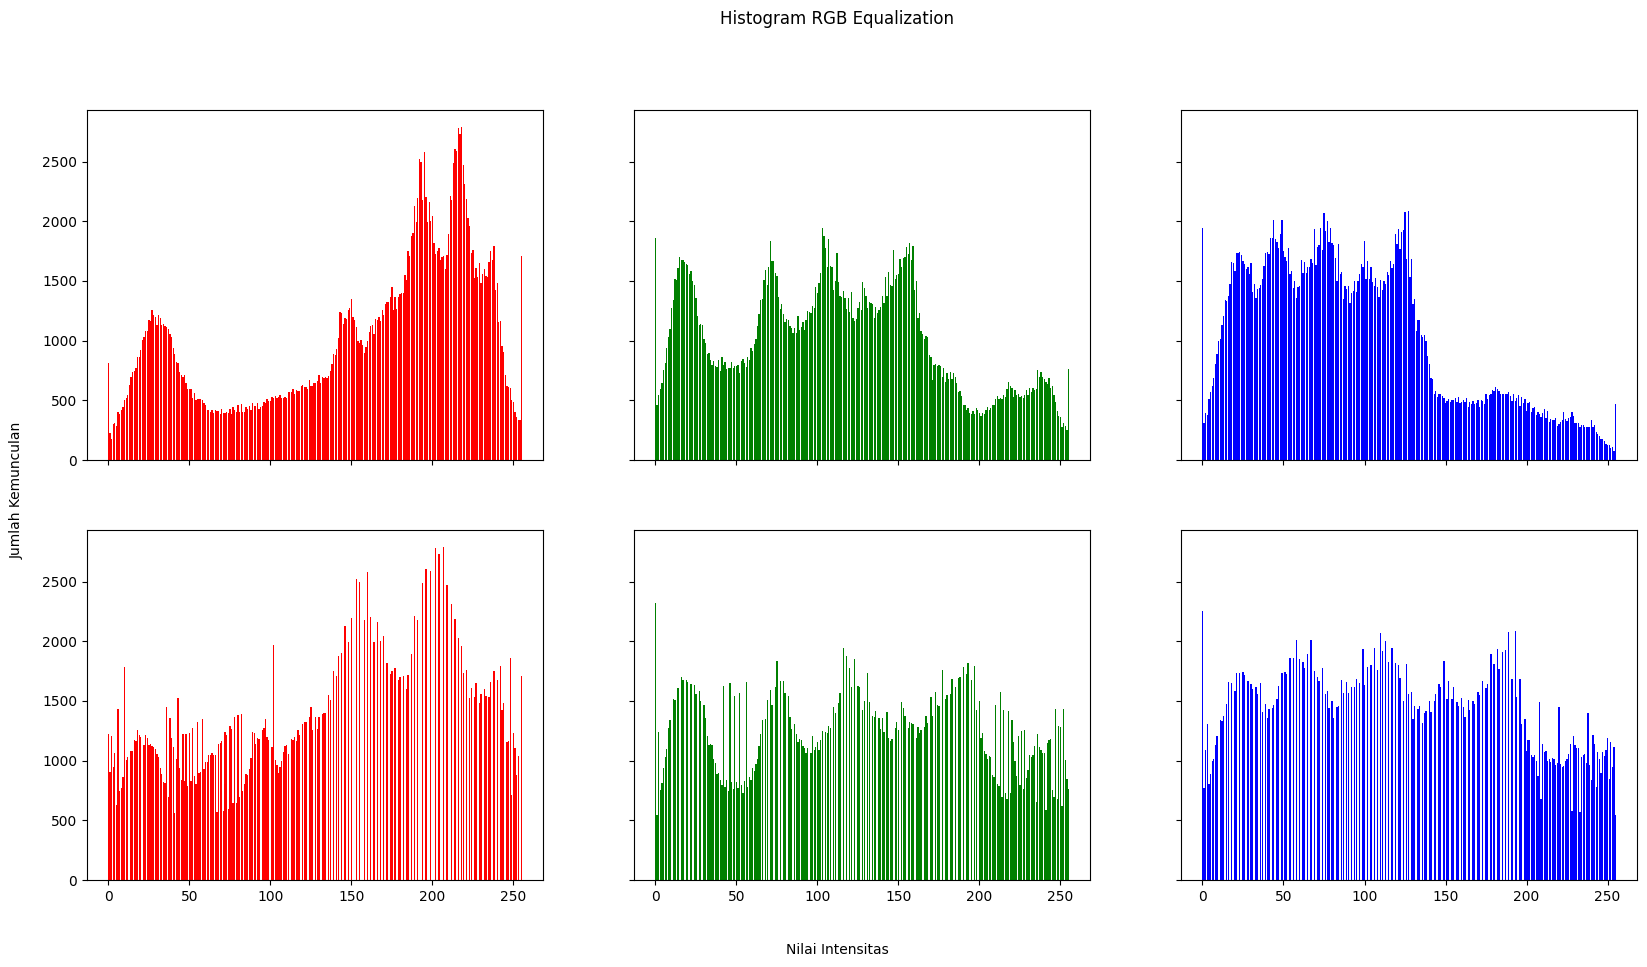

In [7]:
b, g, r = cv.split(img)

b_equalized = cv.equalizeHist(b)
g_equalized = cv.equalizeHist(g)
r_equalized = cv.equalizeHist(r)

fig4, axs4 = plt.subplots(2, 3, figsize=[20, 10], sharex=True, sharey=True)
fig4.suptitle('Histogram RGB Equalization')
fig4.text(0.09, 0.5, 'Jumlah Kemunculan', ha='center', va='center', rotation='vertical')
fig4.text(0.5, 0.04, 'Nilai Intensitas', ha='center', va='center')
axs4[0, 0].bar(names, hist_red, color='red')
axs4[0, 1].bar(names, hist_green, color='green')
axs4[0, 2].bar(names, hist_blue, color='blue')
axs4[1, 0].bar(names, np.histogram(b_equalized, bins=256, range=(0, 256))[0], color='red')
axs4[1, 1].bar(names, np.histogram(g_equalized, bins=256, range=(0, 256))[0], color='green')
axs4[1, 2].bar(names, np.histogram(r_equalized, bins=256, range=(0, 256))[0], color='blue')
plt.show()

setelah saya amati, histogram sebeum dan sesudah equalisasi, frekuensi dan sebaran memiliki perbedaan, setelah equalisasi histogram merepresentasikan gambar dengan kontras tinggi

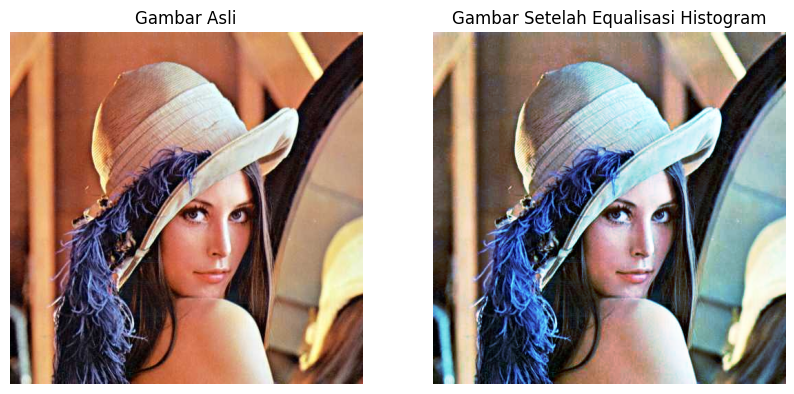

In [8]:
# praktimum D2
img2 = cv.merge((b_equalized, g_equalized, r_equalized))
plt.figure(figsize=[10, 5])
plt.subplot(1, 2, 1)
plt.title('Gambar Asli')
plt.imshow(img)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title('Gambar Setelah Equalisasi Histogram')
plt.imshow(img2)
plt.axis('off')
plt.show()

In [9]:
# hitung nilai PSNR
PSNR = 10 * math.log10((255**2) / np.mean((img - img2) ** 2))
print("Nilai PSNR citra asli dan citra hasil equalization:", PSNR)

Nilai PSNR antara citra asli dan citra hasil equalization: 28.460093386445386


In [15]:
ktm_lama = cv.imread('/content/gdrive/MyDrive/PCVK_MM/Images/KTM lama.jpg', cv.IMREAD_GRAYSCALE)

ktm_lama = cv.cvtColor(ktm_lama, cv.COLOR_BGR2RGB)

b_lama, g_lama, r_lama = cv.split(ktm_lama)
b_lama_equalized = cv.equalizeHist(b_lama)
g_lama_equalized = cv.equalizeHist(g_lama)
r_lama_equalized = cv.equalizeHist(r_lama)

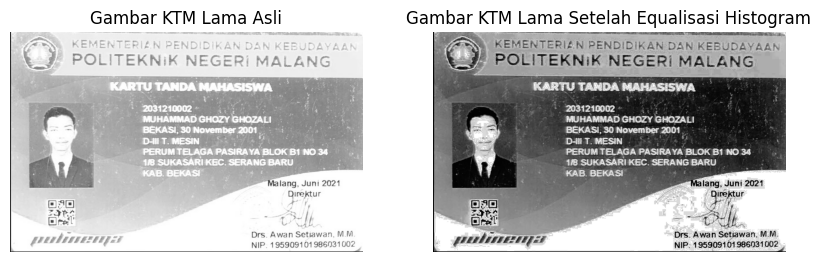

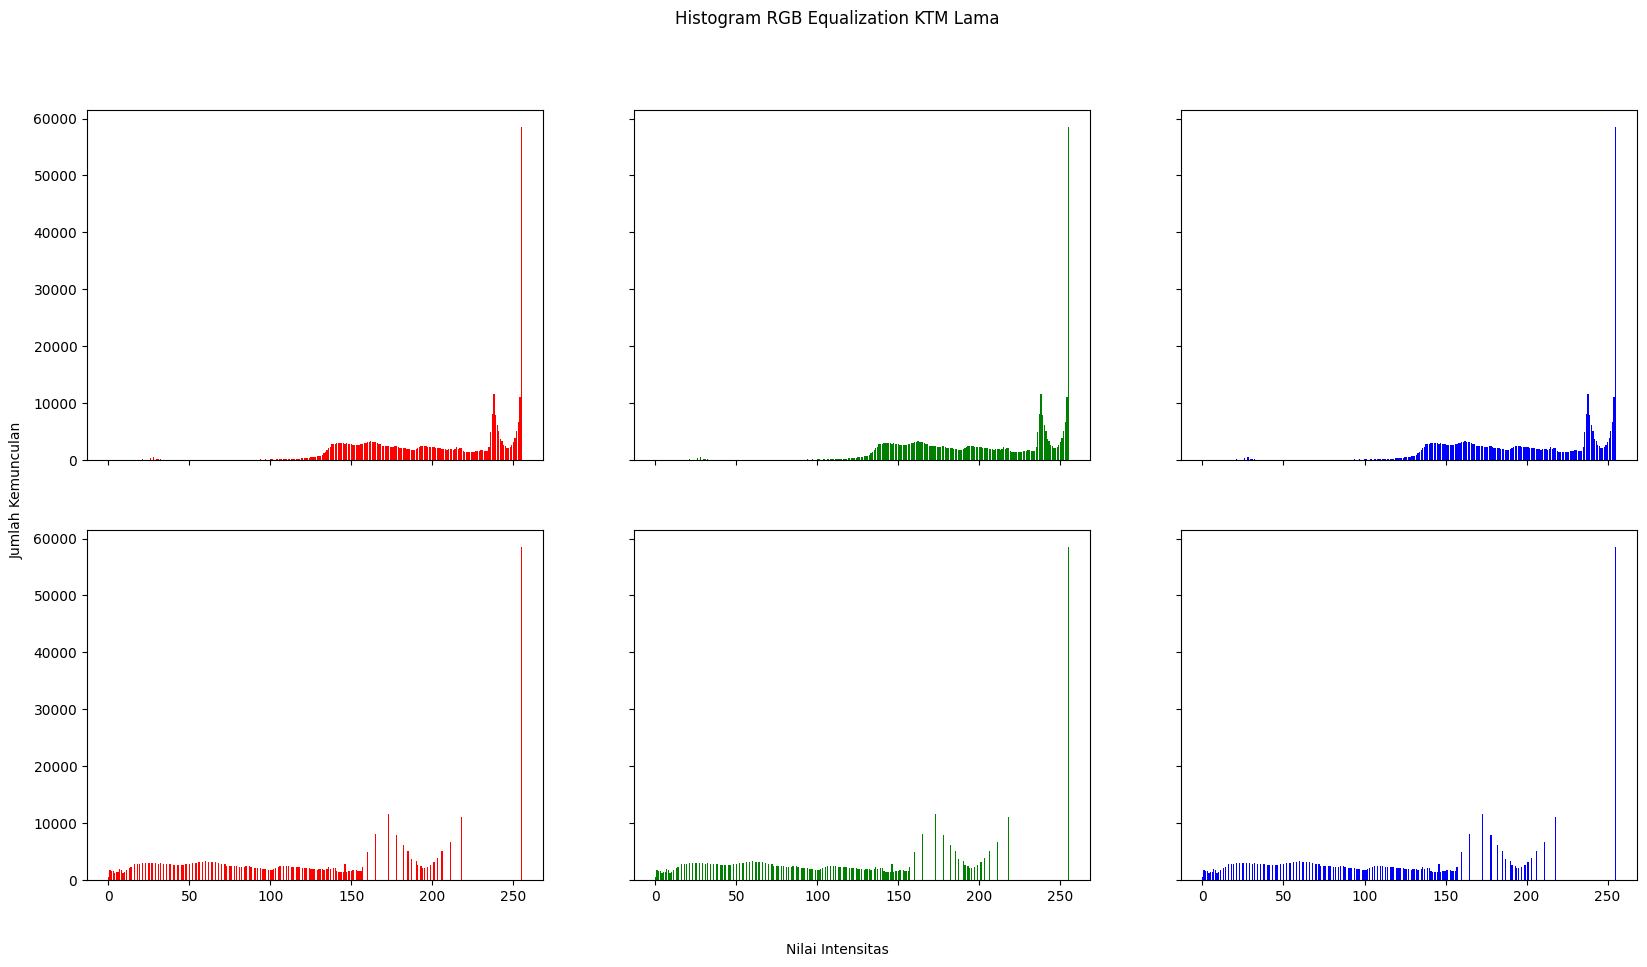

In [16]:
ktm_lama_equalized = cv.merge((b_lama_equalized, g_lama_equalized, r_lama_equalized))
plt.figure(figsize=[10, 5])
plt.subplot(1, 2, 1)
plt.title('Gambar KTM Lama Asli')
plt.imshow(ktm_lama)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title('Gambar KTM Lama Setelah Equalisasi Histogram')
plt.imshow(ktm_lama_equalized)
plt.axis('off')
plt.show()

fig5, axs5 = plt.subplots(2, 3, figsize=[20, 10], sharex=True, sharey=True)
fig5.suptitle('Histogram RGB Equalization KTM Lama')
fig5.text(0.09, 0.5, 'Jumlah Kemunculan', ha='center', va='center', rotation='vertical')
fig5.text(0.5, 0.04, 'Nilai Intensitas', ha='center', va='center')
axs5[0, 0].bar(names, np.histogram(b_lama, bins=256, range=(0, 256))[0], color='red')
axs5[0, 1].bar(names, np.histogram(g_lama, bins=256, range=(0, 256))[0], color='green')
axs5[0, 2].bar(names, np.histogram(r_lama, bins=256, range=(0, 256))[0], color='blue')
axs5[1, 0].bar(names, np.histogram(b_lama_equalized, bins=256, range=(0, 256))[0], color='red')
axs5[1, 1].bar(names, np.histogram(g_lama_equalized , bins=256, range=(0, 256))[0], color='green')
axs5[1, 2].bar(names, np.histogram(r_lama_equalized, bins=256, range=(0, 256))[0], color='blue')
plt.show()

Setelah saya amati, perbedaan tampak pada bagian ketajaman detail, teks yang kontras, dan warna yang lebih mencolok, equalization ini tidak meningkatkan kualitas informasi karena tidak menambah pixel. Tapi membuat detail menjadi lebih tampak karena kontras.

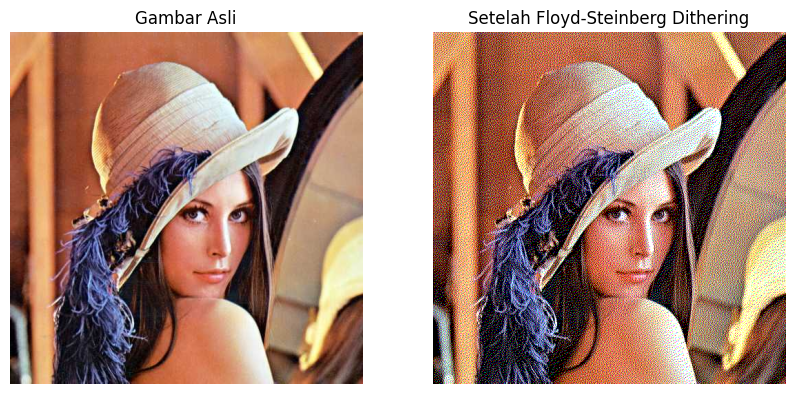

In [18]:
# Praktikum D3 : Dithering
img_dithered = img.astype(np.float32) / 255.0

for y in range(height):
        for x in range(width):
            pixel_old = img_dithered[y, x].copy()
            pixel_new = np.round(pixel_old)
            img_dithered[y, x] = pixel_new
            error = pixel_old - pixel_new
            if x + 1 < width:
                img_dithered[y, x + 1] += error * (7/16.0)

            if y + 1 < height and x - 1 >= 0:
                img_dithered[y + 1, x - 1] += error * (3/16.0)

            if y + 1 < height:
                img_dithered[y + 1, x] += error * (5/16.0)

            if y + 1 < height and x + 1 < width:
                img_dithered[y + 1, x + 1] += error * (1/16.0)


final_image = (img_dithered * 255).astype(np.uint8)
plt.figure(figsize=[10, 5])
plt.subplot(1, 2, 1)
plt.title('Gambar Asli')
plt.imshow(img)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title('Setelah Floyd-Steinberg Dithering')
plt.imshow(final_image)
plt.axis('off')
plt.show()

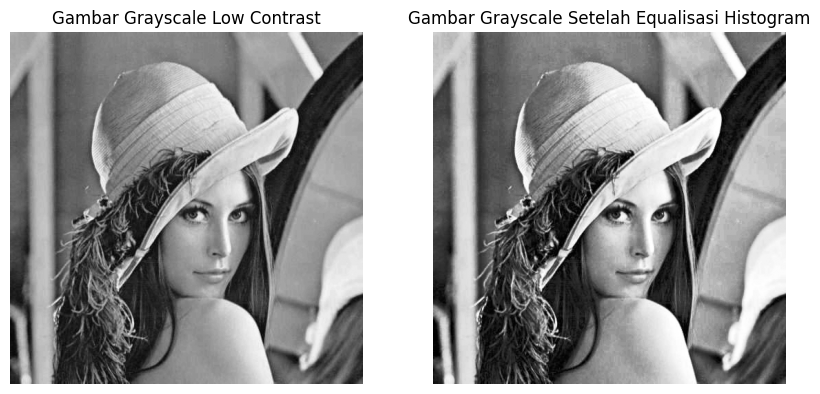

In [19]:
img_lc_gray = cv.cvtColor(img_lc, cv.COLOR_RGB2GRAY)
gray_equalized = cv.equalizeHist(img_lc_gray)
plt.figure(figsize=[10, 5])
plt.subplot(1, 2, 1)
plt.title('Gambar Grayscale Low Contrast')
plt.imshow(img_lc_gray, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title('Gambar Grayscale Setelah Equalisasi Histogram')
plt.imshow(gray_equalized, cmap='gray')
plt.axis('off')
plt.show()

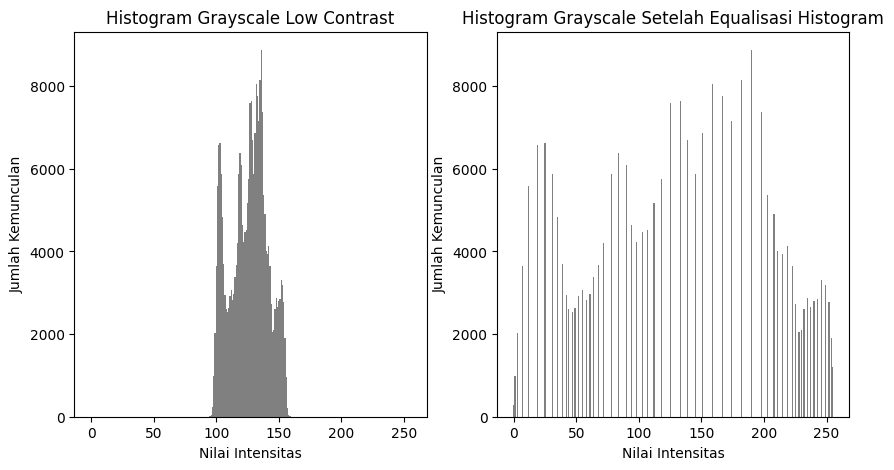

In [20]:
plt.figure(figsize=[10, 5])
plt.subplot(1, 2, 1)
plt.title('Histogram Grayscale Low Contrast')
plt.xlabel('Nilai Intensitas')
plt.ylabel('Jumlah Kemunculan')
plt.bar(np.arange(256), np.histogram(img_lc_gray, bins=256, range=(0, 256))[0], width=1, color='gray')
plt.subplot(1, 2, 2)
plt.title('Histogram Grayscale Setelah Equalisasi Histogram')
plt.xlabel('Nilai Intensitas')
plt.ylabel('Jumlah Kemunculan')
plt.bar(np.arange(256), np.histogram(gray_equalized, bins=256, range=(0, 256))[0], width=1, color='gray')
plt.show()


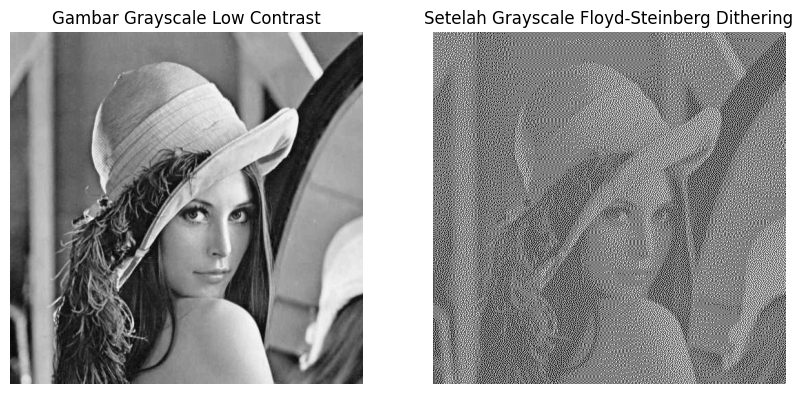

In [22]:
img_gray_dithered = img_lc_gray.astype(np.float32) / 255.0
height_gray, width_gray = img_lc_gray.shape
for y in range(height_gray):
        for x in range(width_gray):
            pixel_old = img_gray_dithered[y, x].copy()
            pixel_new = np.round(pixel_old)
            img_gray_dithered[y, x] = pixel_new
            error = pixel_old - pixel_new
            if x + 1 < width_gray:
                img_gray_dithered[y, x + 1] += error * (7/16.0)

            if y + 1 < height_gray and x - 1 >= 0:
                img_gray_dithered[y + 1, x - 1] += error * (3/16.0)

            if y + 1 < height_gray:
                img_gray_dithered[y + 1, x] += error * (5/16.0)

            if y + 1 < height_gray and x + 1 < width_gray:
                img_gray_dithered[y + 1, x + 1] += error * (1/16.0)
final_gray_image = (img_gray_dithered * 255).astype(np.uint8)
plt.figure(figsize=[10, 5])
plt.subplot(1, 2, 1)
plt.title('Gambar Grayscale Low Contrast')
plt.imshow(img_lc_gray, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title('Setelah Grayscale Floyd-Steinberg Dithering')
plt.imshow(final_gray_image, cmap='gray')
plt.axis('off')
plt.show()